# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\CustomProgram\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
load_dotenv()
newsapi_key = os.getenv('NEWSAPI_KEY')

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=newsapi_key)

from pynytimes import NYTAPI
nyt = NYTAPI(os.getenv('NYT_KEY'))

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(
    q='bitcoin', language='en', sort_by='relevancy'
)

In [5]:
bitcoin_articles

{'status': 'ok',
 'totalResults': 3761,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'John Biggs',
   'title': 'Crypto Traders Cut Out the Middleman, Simply Rob Victim',
   'description': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customer’s 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came in to do the trade.Read more...',
   'url': 'https://gizmodo.com/crypto-traders-cut-out-the-middleman-simply-rob-victim-1845011301',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/li0fkkejdmaugm8v1fkw.jpg',
   'publishedAt': '2020-09-10T14:28:00Z',
   'content': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]'},
  {'source': {'id

In [6]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(
    q='ethereum', language='en', sort_by='relevancy'
)

In [7]:
ethereum_articles

{'status': 'ok',
 'totalResults': 1421,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Stan Schroeder',
   'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
   'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
   'url': 'https://mashable.com/article/metamask-ios-android/',
   'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
   'publishedAt': '2020-09-02T16:00:00Z',
   'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension t

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_scores = [analyzer.polarity_scores(article['content']) for article in bitcoin_articles['articles']]
bitcoin_df = pd.DataFrame(
    data={
        'Compound': [score['compound'] for score in bitcoin_scores],
        'Negative': [score['neg'] for score in bitcoin_scores],
        'Neutral': [score['neu'] for score in bitcoin_scores],
        'Positive': [score['pos'] for score in bitcoin_scores],
        'text': [article['content'] for article in bitcoin_articles['articles']]
    }
)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.6908,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...
1,0.0000,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
2,0.2732,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...
3,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."
4,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."


In [9]:
# Create the ethereum sentiment scores DataFrame
valid_ethereum_articles = list(filter(lambda x: x['content'] != None, ethereum_articles['articles'])) # A few articles has content == None therefore filtering them out
ethereum_scores = [analyzer.polarity_scores(article['content']) for article in valid_ethereum_articles]
ethereum_df = pd.DataFrame(
    data={
        'Compound': [score['compound'] for score in ethereum_scores],
        'Negative': [score['neg'] for score in ethereum_scores],
        'Neutral': [score['neu'] for score in ethereum_scores],
        'Positive': [score['pos'] for score in ethereum_scores],
        'text': [article['content'] for article in valid_ethereum_articles]
    }
)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
4,0.0000,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.371550,0.008000,0.915950,0.076050
std,0.320603,0.035777,0.046388,0.046397
min,-0.690800,0.000000,0.802000,0.000000
25%,0.448550,0.000000,0.910000,0.083250
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.910000,0.090000
max,0.750600,0.160000,1.000000,0.198000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.190694,0.015688,0.921312,0.063062
std,0.298172,0.034763,0.085886,0.070121
min,-0.267700,0.000000,0.747000,0.000000
25%,0.000000,0.000000,0.871000,0.000000
50%,0.000000,0.000000,0.931000,0.053500
75%,0.401900,0.000000,1.000000,0.097250
max,0.757900,0.110000,1.000000,0.209000


### Questions:

Q: Which coin had the highest mean positive score?

In [12]:
print(f"A: {'Bitcoin' if bitcoin_df.Positive.mean() > ethereum_df.Positive.mean() else 'Ethereum'} @ {max(bitcoin_df.Positive.mean(),ethereum_df.Positive.mean())}")

A: Bitcoin @ 0.07605


Q: Which coin had the highest compound score?

In [13]:
print(f"A: {'Bitcoin' if bitcoin_df.Compound.mean() > ethereum_df.Compound.mean() else 'Ethereum'} @ {max(bitcoin_df.Compound.mean(),ethereum_df.Compound.mean())}")

A: Bitcoin @ 0.37154999999999994


Q. Which coin had the highest positive score?

In [14]:
print(f"A: {'Bitcoin' if bitcoin_df.Positive.max() > ethereum_df.Positive.max() else 'Ethereum'} @ {max(bitcoin_df.Positive.max(),ethereum_df.Positive.max())}")

A: Ethereum @ 0.209


---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    '''Tokenizes text.'''
    
    # Create a list of the words
    text_list = text.split(' ')

    # Convert the words to lowercase
    text_list = [text.lower() for text in text_list]
    
    # Remove the stop words
    text_list = [text for text in text_list if text not in sw]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z]")
    text_list = [regex.sub('', text) for text in text_list]
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(text) for text in text_list if text != '']
    
    return tokens


In [18]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df.text.apply(
    lambda x: tokenizer(x)
)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.6908,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa..."
1,0.0000,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry..."
2,0.2732,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...,"[the, covid, pandemic, resulted, mass, shift, ..."
3,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagoslondon, reuters, four, month, ago, abola..."
4,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagoslondon, reuters, four, month, ago, abola..."


In [19]:
# Create a new tokens column for ethereum
ethereum_df['tokens'] = ethereum_df.text.apply(
    lambda x: tokenizer(x)
)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...,"[interacted, cryptocurrencies, past, couple, y..."
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[tldr, complete, stock, cryptocurrency, invest..."
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, readopinions, expressed, entr..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
4,0.0000,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklynbased, technology..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [34]:
from collections import Counter
from nltk import ngrams

In [35]:
# Generate the Bitcoin N-grams where N=2
Counter(ngrams(bitcoin_df.tokens.sum(), n=2)).most_common(20)

[(('satoshi', 'nakaboto'), 28),
 (('char', 'robot'), 14),
 (('robot', 'colleague'), 14),
 (('colleague', 'satoshi'), 14),
 (('nakaboto', 'writes'), 14),
 (('writes', 'bitcoin'), 14),
 (('every', 'fucking'), 14),
 (('fucking', 'daywelcome'), 14),
 (('daywelcome', 'another'), 14),
 (('another', 'edition'), 14),
 (('edition', 'bitcoin'), 14),
 (('bitcoin', 'today'), 14),
 (('today', 'i'), 14),
 (('i', 'satoshi'), 14),
 (('nakaboto', 'tell'), 14),
 (('tell', 'whats'), 14),
 (('whats', 'going'), 14),
 (('going', 'bitcoin'), 14),
 (('bitcoin', 'char'), 14),
 (('bitcoin', 'btc'), 11)]

In [36]:
# Generate the Ethereum N-grams where N=2
Counter(ngrams(ethereum_df.tokens.sum(), n=2)).most_common(20)

[(('char', 'tldr'), 2),
 (('char', 'september'), 2),
 (('september', 'min'), 2),
 (('min', 'readopinions'), 2),
 (('readopinions', 'expressed'), 2),
 (('expressed', 'entrepreneur'), 2),
 (('entrepreneur', 'contributor'), 2),
 (('satoshi', 'nakaboto'), 2),
 (('char', 'ethereum'), 2),
 (('decentralized', 'exchange'), 2),
 (('photo', 'illustration'), 2),
 (('imageslightrocket', 'via'), 2),
 (('via', 'getty'), 2),
 (('price', 'bitcoin'), 2),
 (('interacted', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'past'), 1),
 (('past', 'couple'), 1),
 (('couple', 'year'), 1),
 (('year', 'there'), 1),
 (('there', 'good'), 1)]

In [37]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    '''Returns the top N tokens from the frequency count'''
    return Counter(tokens).most_common(N)

In [33]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_df.tokens.sum())

[('bitcoin', 43),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('char', 20),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14),
 ('daywelcome', 14)]

In [25]:
# Get the top 10 words for Ethereum
token_count(ethereum_df.tokens.sum())

[('char', 16),
 ('bitcoin', 8),
 ('ethereum', 7),
 ('cryptocurrency', 6),
 ('used', 3),
 ('september', 3),
 ('price', 3),
 ('decentralized', 3),
 ('exchange', 3),
 ('getty', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [30.0, 15.0]

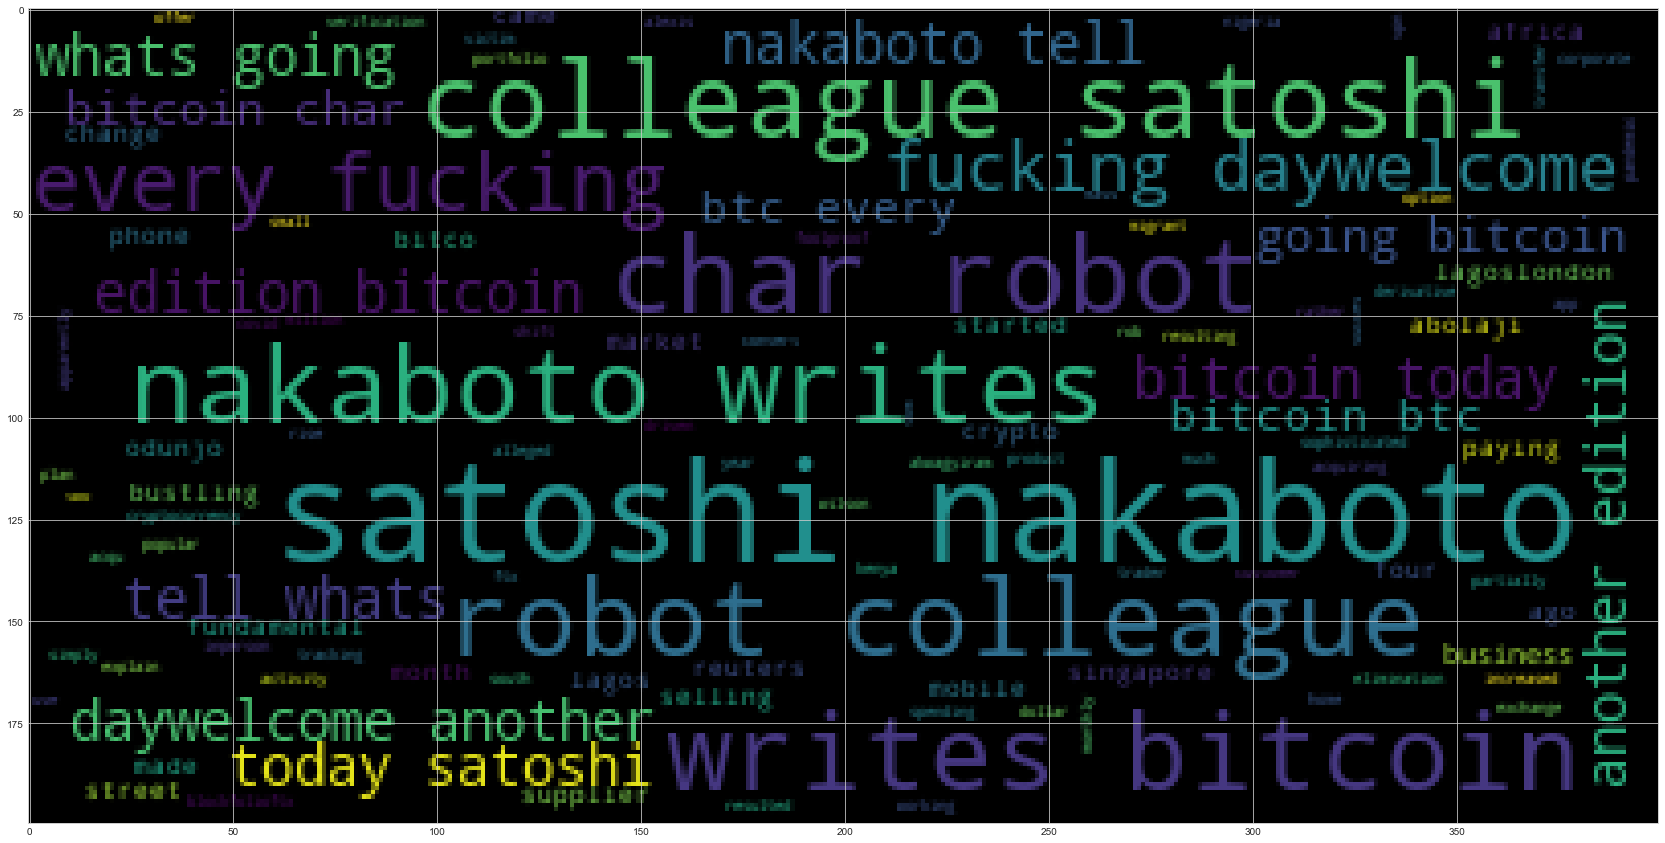

In [38]:
# Generate the Bitcoin word cloud
bitcoin_wc = WordCloud().generate(' '.join(bitcoin_df.tokens.sum()))
plt.imshow(bitcoin_wc)

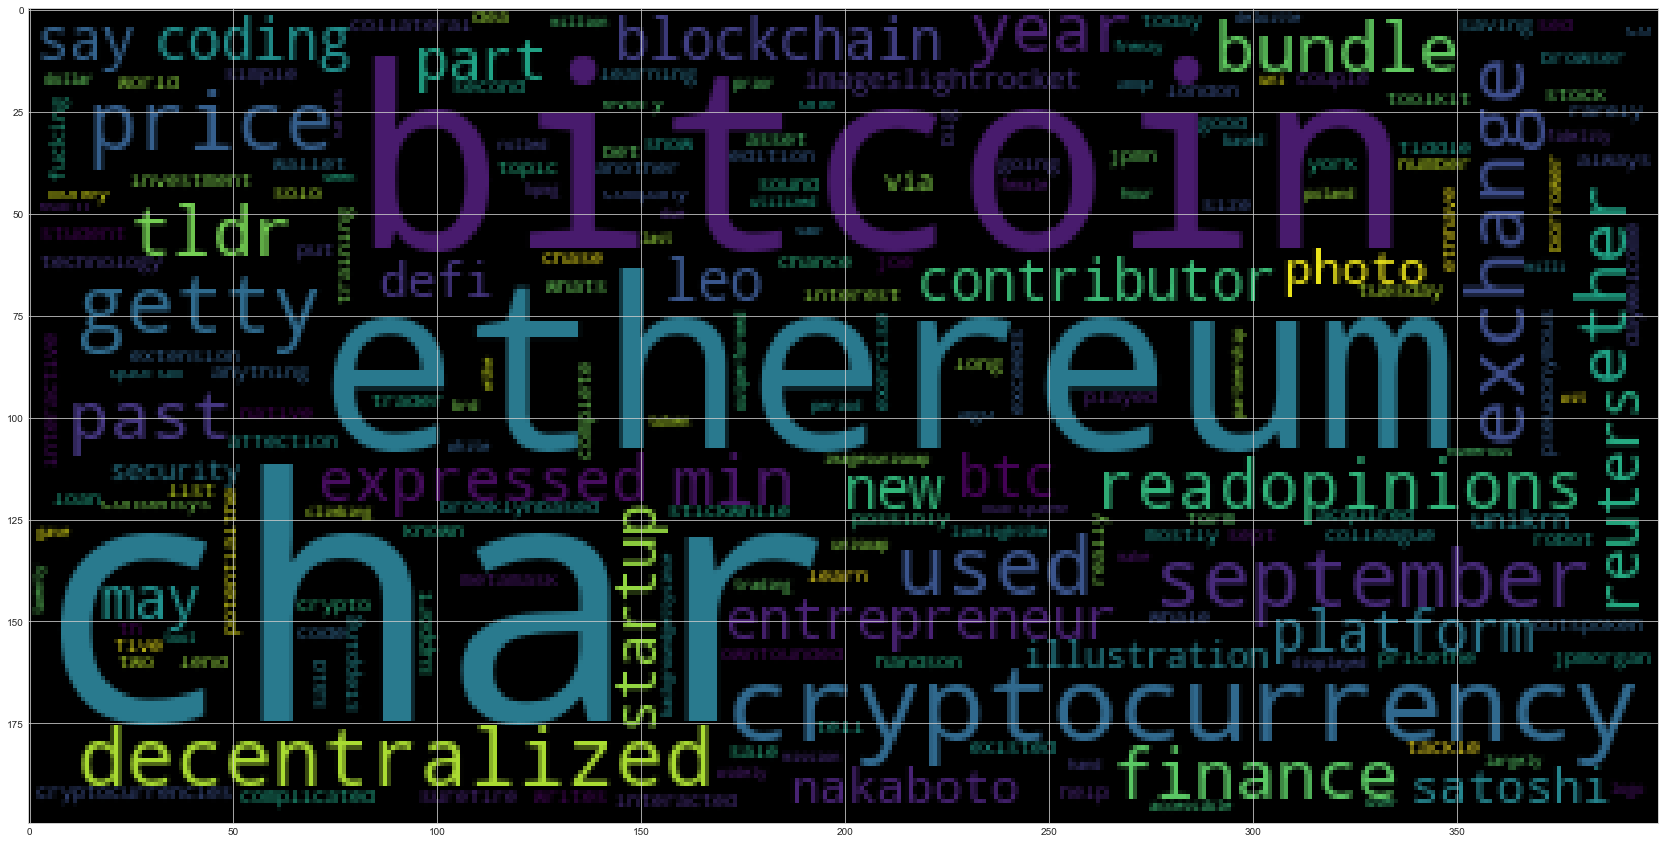

In [29]:
# Generate the Ethereum word cloud
ethereum_wc = WordCloud().generate(' '.join(ethereum_df.tokens.sum()))
plt.imshow(ethereum_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [39]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [44]:
# Concatenate all of the bitcoin text together
bitcoin_texts = ' '.join(bitcoin_df.text.to_list())
bitcoin_texts

'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars] By Alexis Akwagyiram, Tom Wilson\r\n* Monthly crypto transfers to and from Africa rise 55% in a year\r\n* Much of the activity in Nigeria, South Africa and Kenya\r\n* Driven by small businesses and migrant… [+7730 chars] “The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars] LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos: He started paying his suppliers in bitco… [+7646 chars] LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustlin

In [49]:
# Run the NER processor on all of the text
bitcoin_nlp = nlp(bitcoin_texts)

# Add a title to the document
bitcoin_nlp.user_data['title'] = 'Bitcoin NER'

In [50]:
# Render the visualization
displacy.render(bitcoin_nlp, style='ent')

In [52]:
# List all Entities
for entity in bitcoin_nlp.ents:
    print(f'{entity.text} {entity.label_}')

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
VPN PRODUCT
LAGOS/LONDON ORG
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LAGOS/LONDON ORG
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockfolio GPE
FTX ORG
$150 million MONEY
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bi

---

## Ethereum NER

In [53]:
# Concatenate all of the Ethereum text together
ethereum_texts = ' '.join(ethereum_df.text.to_list())
ethereum_texts

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars] TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars] September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars] LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars] NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockc

In [54]:
# Run the NER processor on all of the text
ethereum_nlp = nlp(ethereum_texts)

# Add a title to the document
ethereum_nlp.user_data['title'] = 'Ethereum NER'

In [55]:
# Render the visualization
displacy.render(ethereum_nlp, style='ent')

In [56]:
# List all Entities
for entity in ethereum_nlp.ents:
    print(f'{entity.text} {entity.label_}')

the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
September DATE
18 DATE
2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
LONDON GPE
Reuters ORG
about 20% PERCENT
NEW YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
$100 million MONEY
Deloitte ORG
KPMG ORG
Fidelity ORG
$100 milli MONEY
Uniswap ORG
400 CARDINAL
UNI ORG
September 1 DATE
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
Ethereum ORG
Mateusz Slodkowski/ PERSON
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
The Securities and Exchange Commission ORG
Unikrn ORG
Unikrn ORG
UnikoinGold ORG
September DATE
16 DATE
2020 DATE
6